In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv("winequality-red.csv")

**Show Top 5 Records**

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**about data_set** --> **https://archive.ics.uci.edu/ml/datasets/wine+quality**

classification problem

- fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- citric acid - found in small quantities, citric acid can add 'freshness' and flavor to wines
- residual sugar -the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and
- chlorides - the amount of salt in the wine
- free sulfur dioxide- the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents
- total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2
- density - the density of water is close to that of water depending on the percent alcohol and sugar c
- pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the
- sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and
- alcohol - the percent alcohol content of the wine
- quality- output variable (based on sensory data, score between 0 and 10)

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**report**
- In residual sugar , Free Sulfur Dioxide ,Total sulfur Dioxide  have large difference between 75% to max  ( it means there may be outliers  are present)

**Shape of the dataset**

In [16]:
df.shape

(1599, 12)

**Check Datatypes in the dataset**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
# all the data is numerical

In [19]:
#checking null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
# so there are no null values so we are good to go 

# droping duplicate

In [23]:
df.duplicated().sum()

240

In [24]:
df=df.drop_duplicates()

In [25]:
df.duplicated().sum()

0

## Univariate Analysis 

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

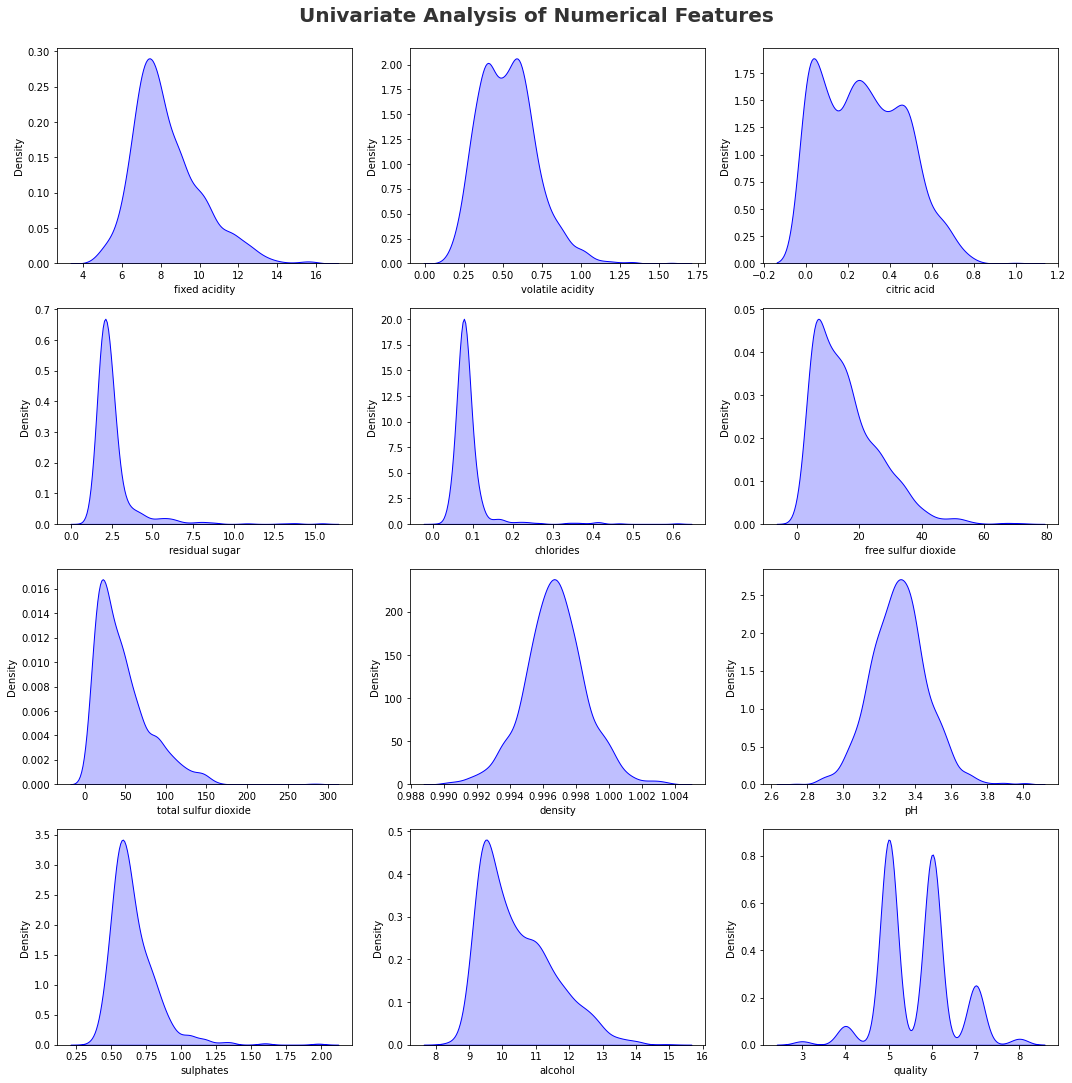

In [26]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df.columns)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True, color='b')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

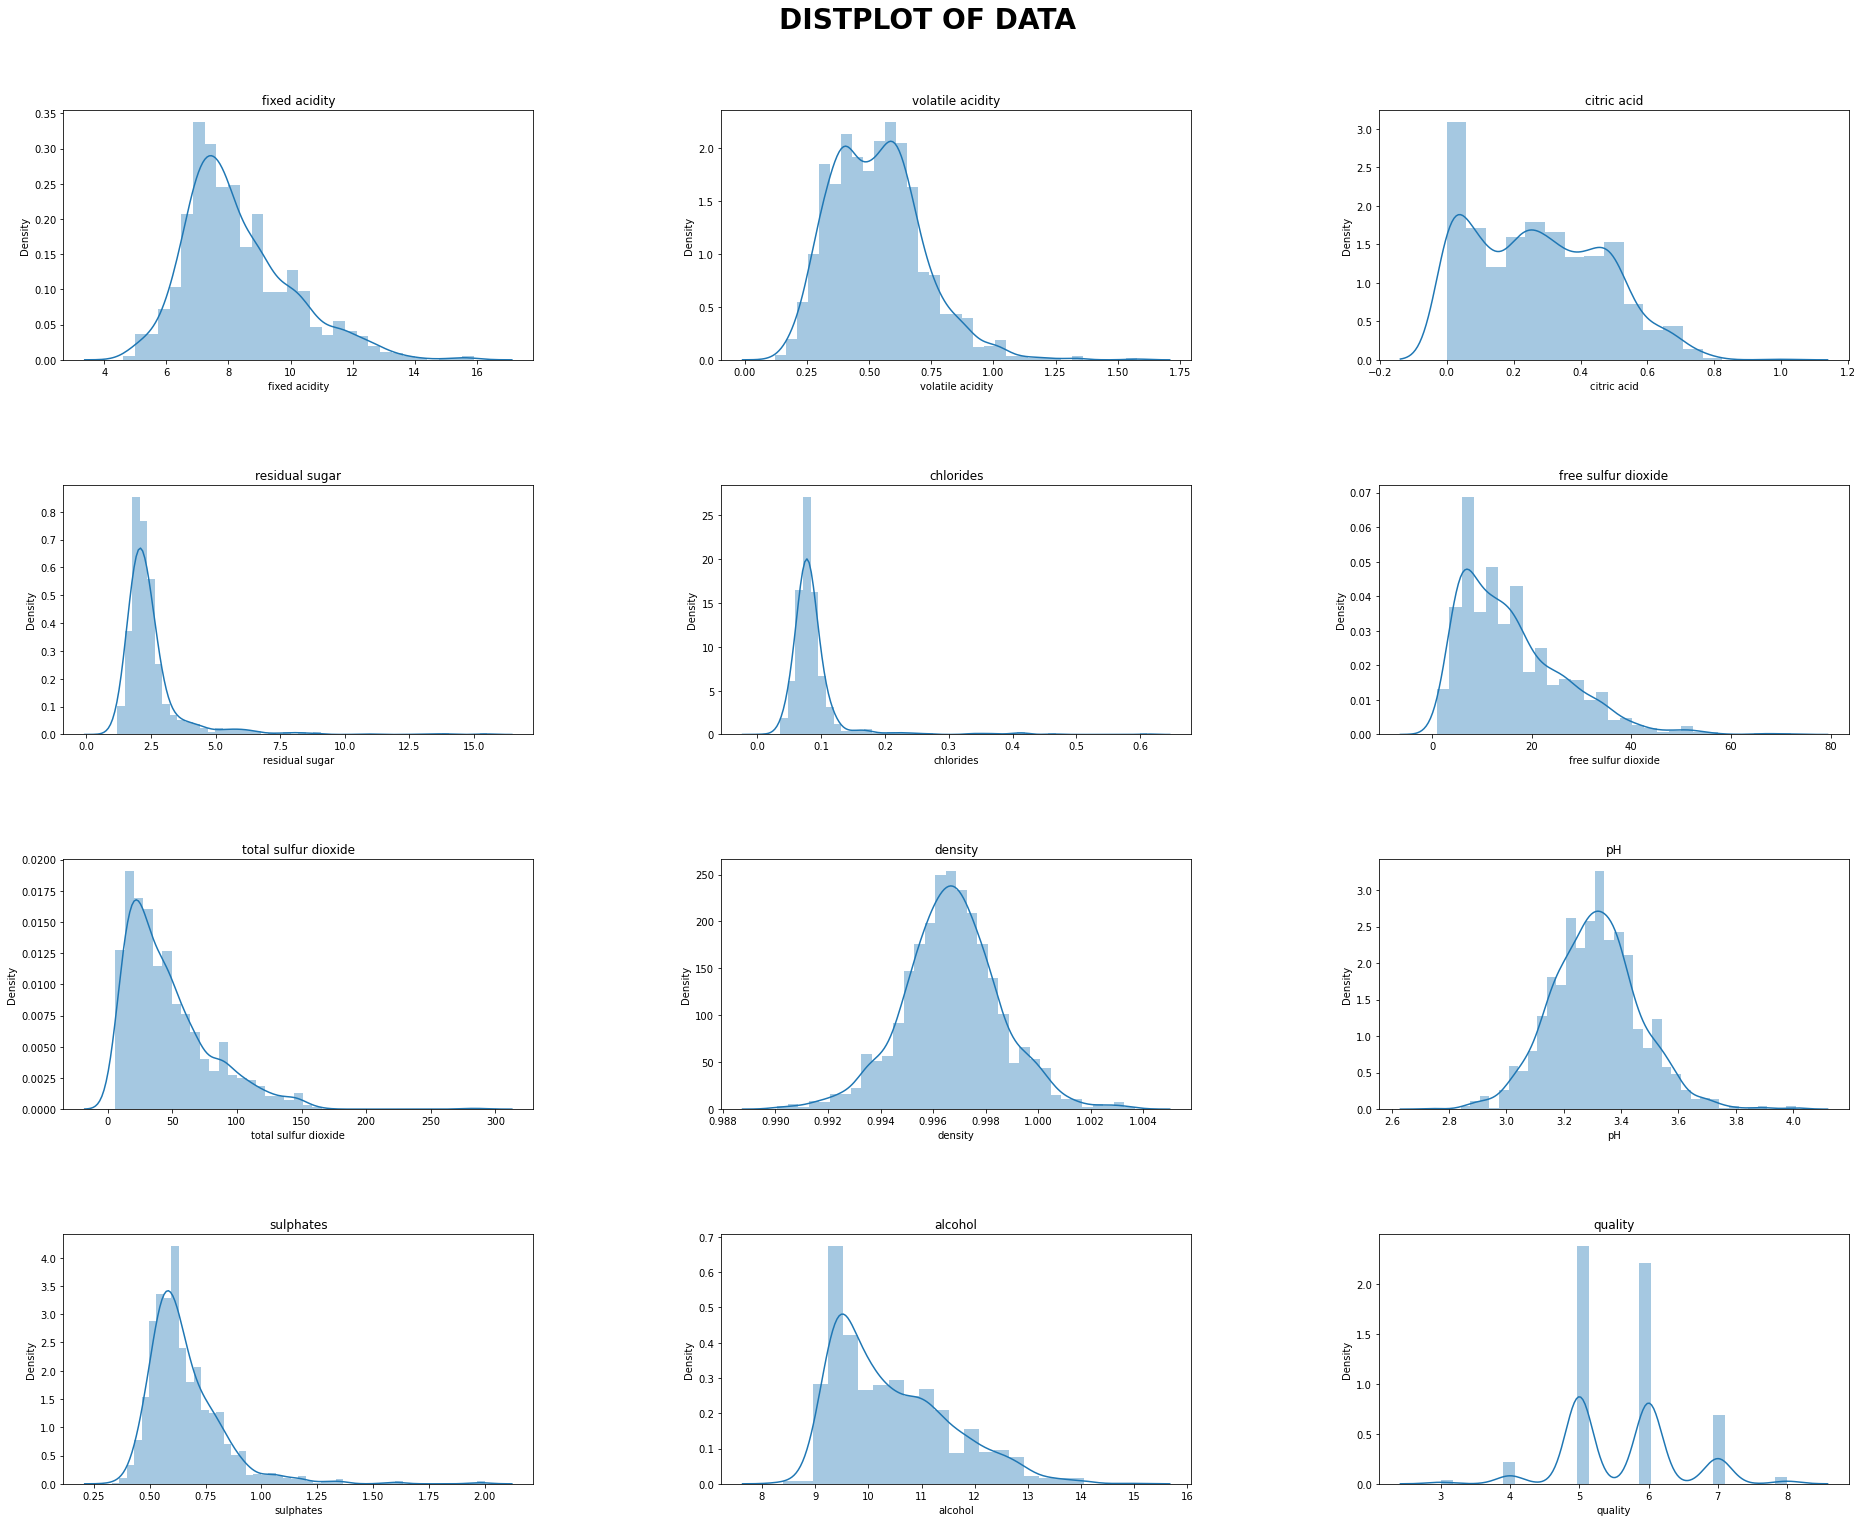

In [27]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(df.columns):  
    ax1 = fig.add_subplot(4,3, i+1);
    ax1 = sns.distplot(df[col]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

#### report
- free acidity ,volatile acidity,residual sugar , chlorides,Free Sulfur Dioxide ,Total sulfur Dioxide ,sulphates,alcohol   are  rightly skewed so there may be outliers are there


### checking target Feature

In [28]:
df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<AxesSubplot:>

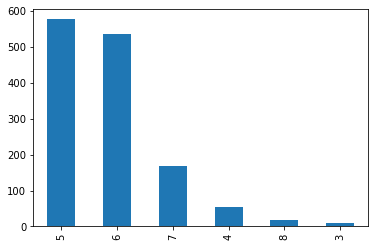

In [29]:
df["quality"].value_counts().plot(kind="bar")

- This is multiclass classification --> with 6 classes


In [30]:
# ploting the box plot

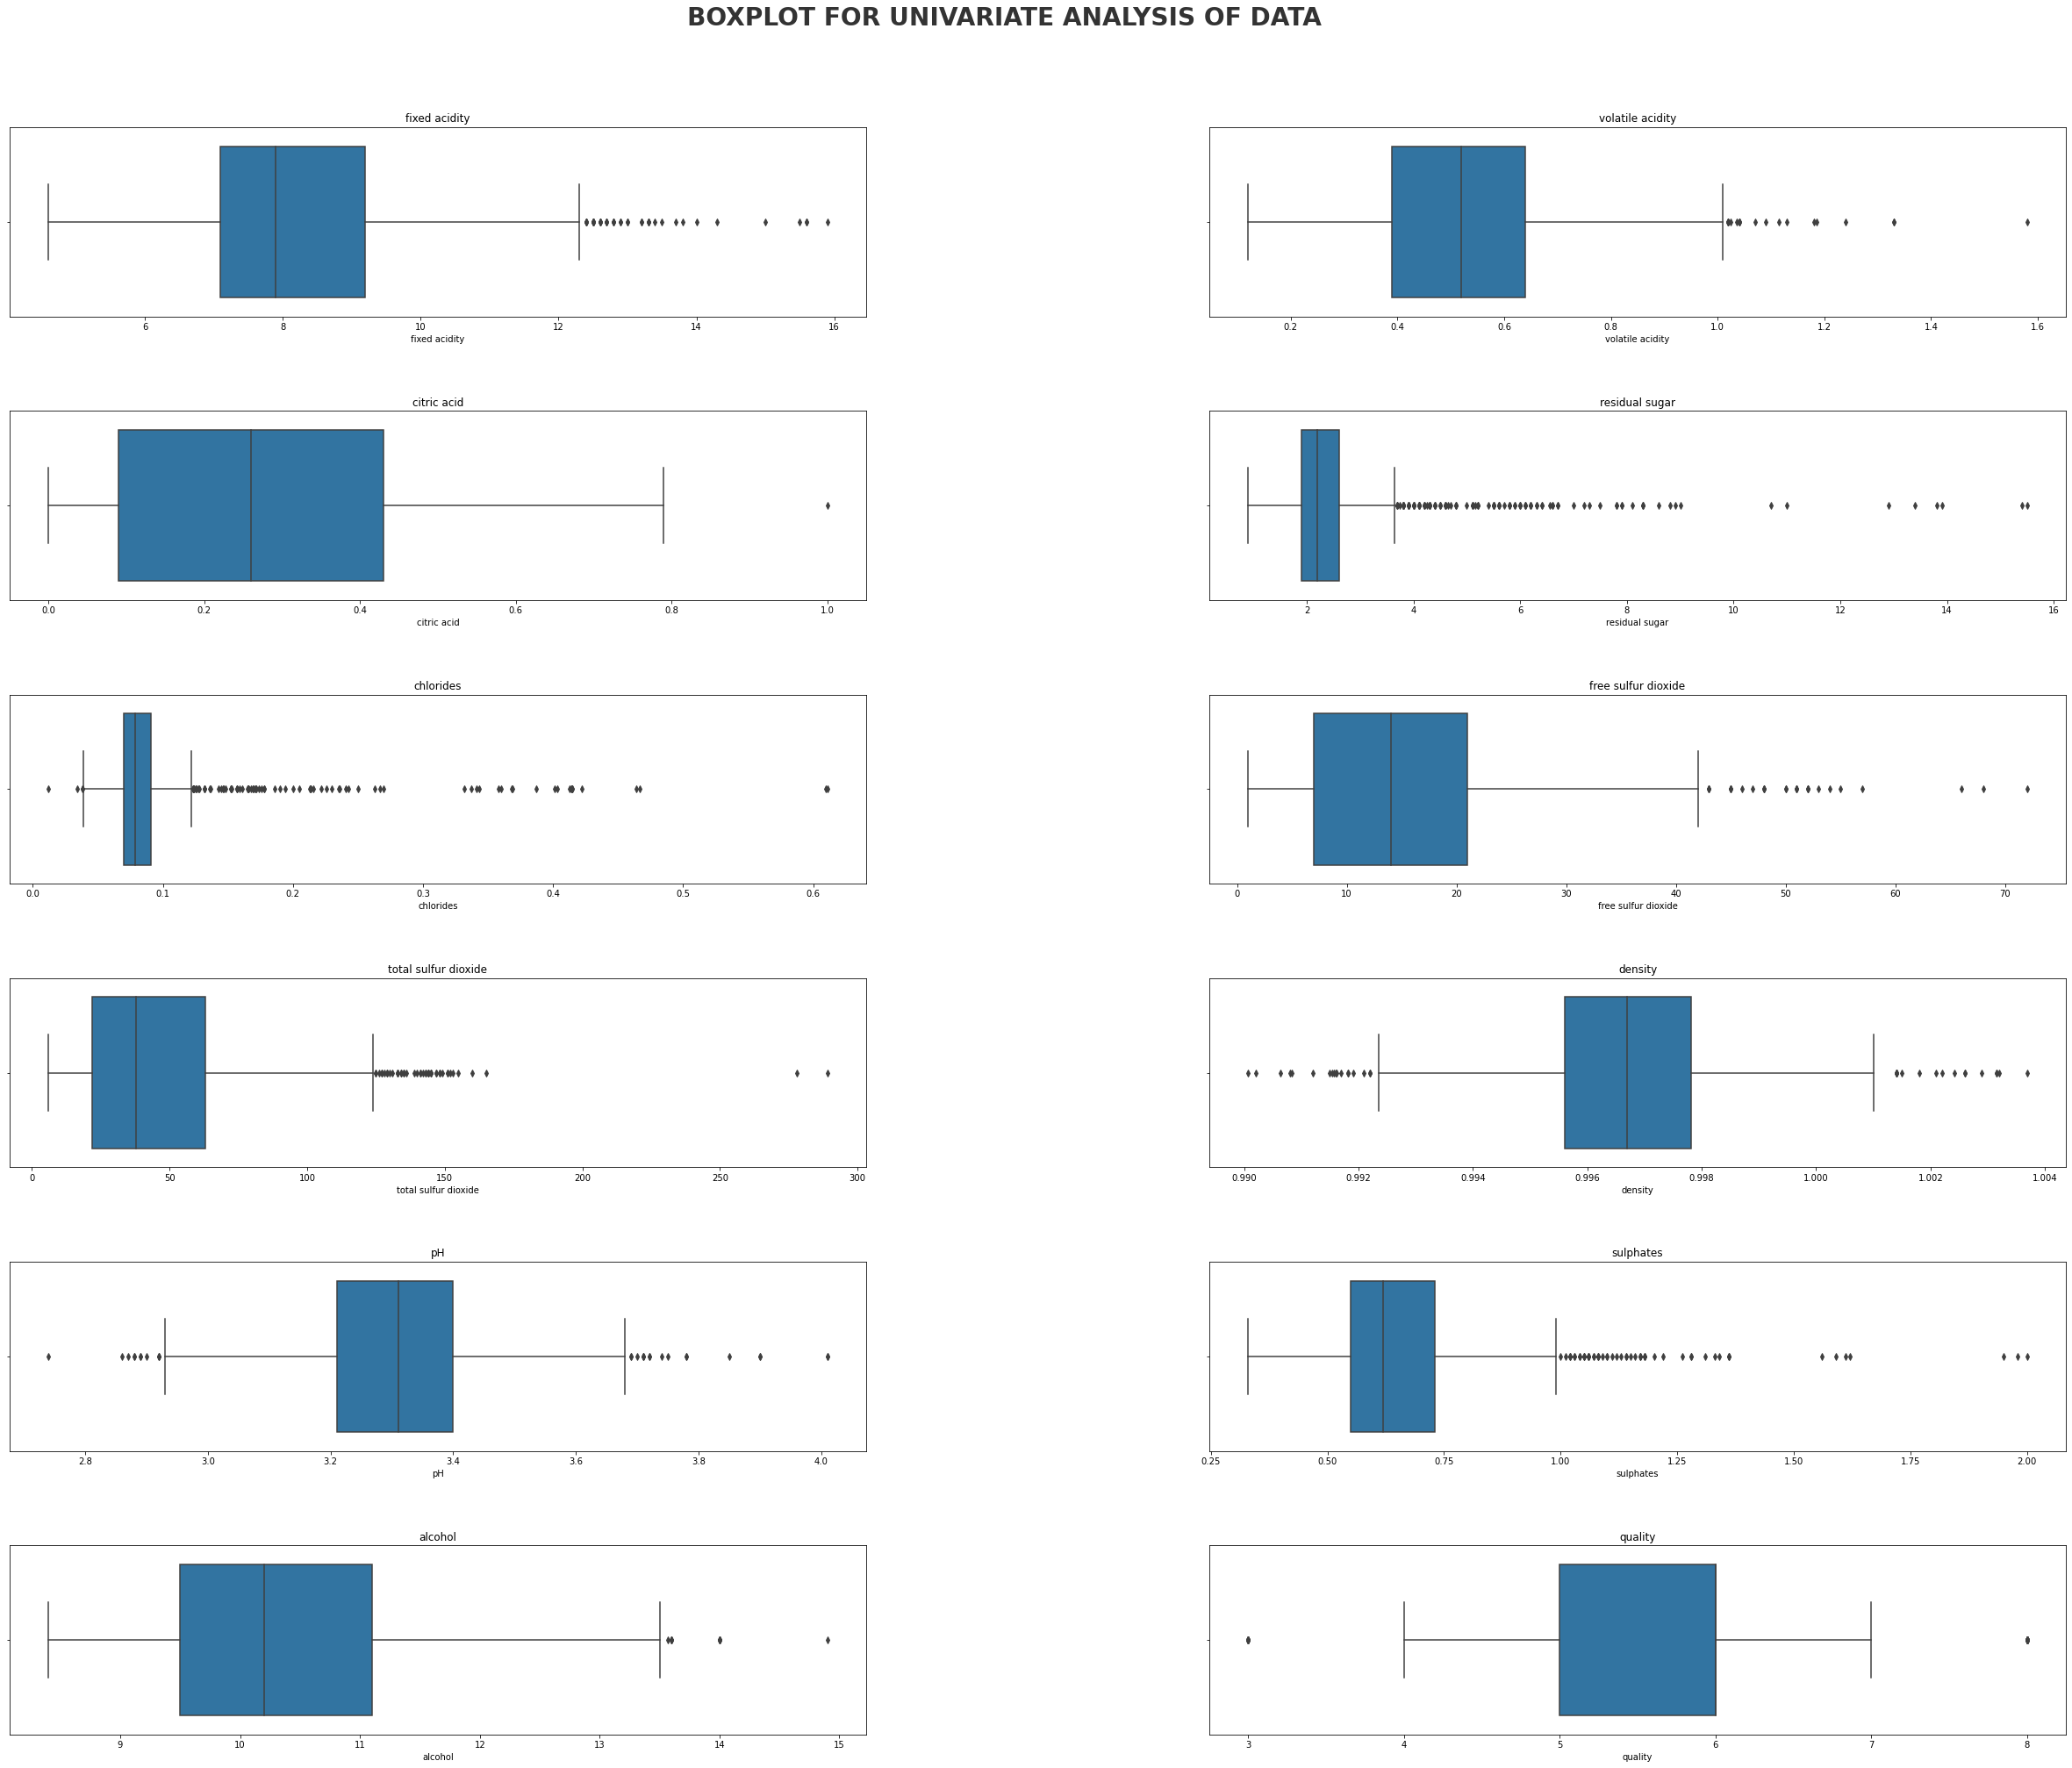

In [31]:
features = df.columns
fig = plt.figure(figsize=[42,32])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold', alpha=0.8,)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(features):  
    ax1 = fig.add_subplot(6,2, i+1);
    ax1 = sns.boxplot(data = df, x=col,);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

**report**
- mostly all the fetures are containing outliers so we need to handel them before proceding any further


**handling outliers**

uning Interquartile Range Method( IQR ) method for feature having skewed data

In [32]:
# before proceding any further ,first creating a copy of data
df1=df.copy()

In [33]:
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [34]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

In [35]:
# using iqr method for free acidity ,volatile acidity,residual sugar , chlorides,Free Sulfur Dioxide ,Total sulfur Dioxide ,sulphates,alcohol  

In [36]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

**for fixed acidity**

In [37]:
remove_outliers_IQR('fixed acidity')

percentile25 7.1
percentile75 9.2
Upper limit 12.349999999999998
Lower limit 3.95


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


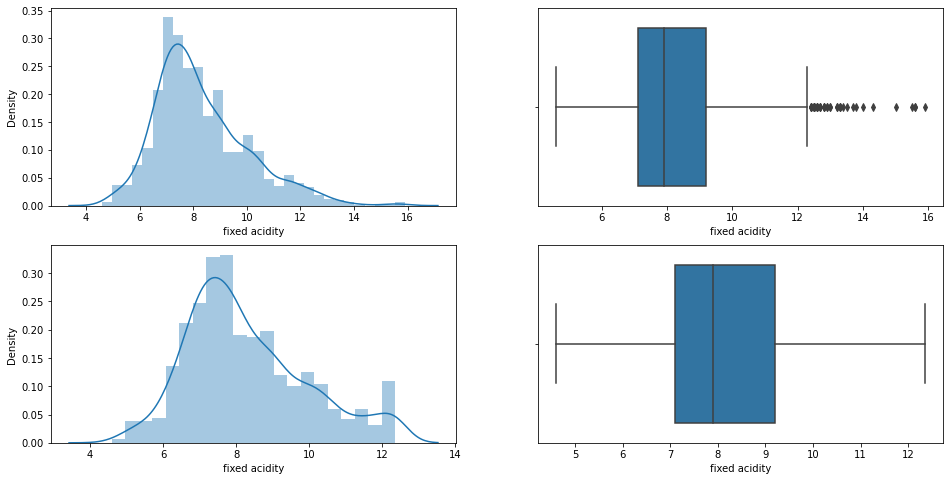

In [38]:
create_comparison_plot(df,df1,"fixed acidity")

**for volatile acidity**

In [39]:
remove_outliers_IQR('volatile acidity')

percentile25 0.39
percentile75 0.64
Upper limit 1.0150000000000001
Lower limit 0.015000000000000013


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


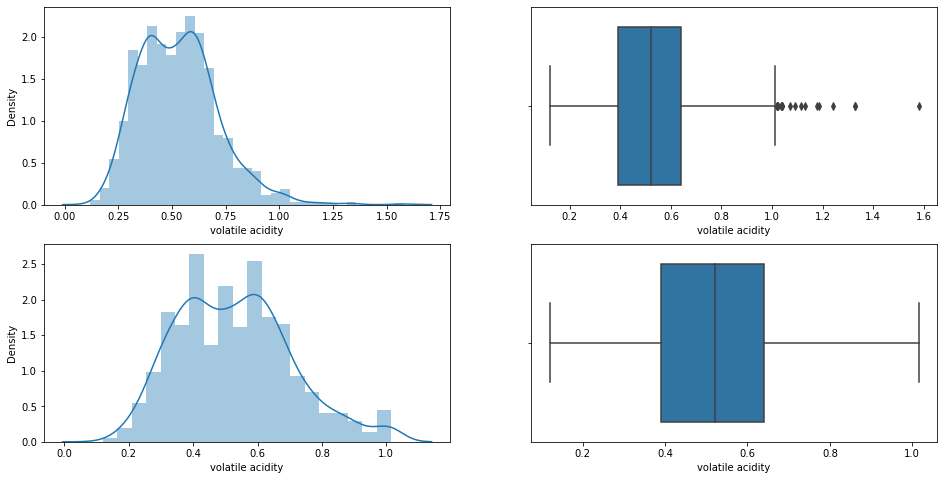

In [40]:
create_comparison_plot(df,df1,"volatile acidity")

**for residual sugar**

In [41]:
remove_outliers_IQR('residual sugar')

percentile25 1.9
percentile75 2.6
Upper limit 3.6500000000000004
Lower limit 0.8499999999999996


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


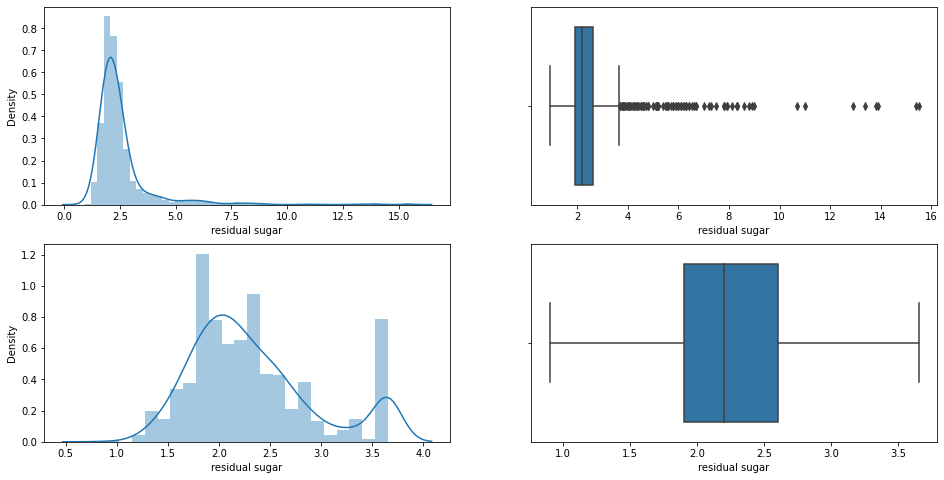

In [42]:
create_comparison_plot(df,df1,"residual sugar")

**for chlorides**

In [43]:
remove_outliers_IQR('chlorides')

percentile25 0.07
percentile75 0.091
Upper limit 0.12249999999999998
Lower limit 0.03850000000000002


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


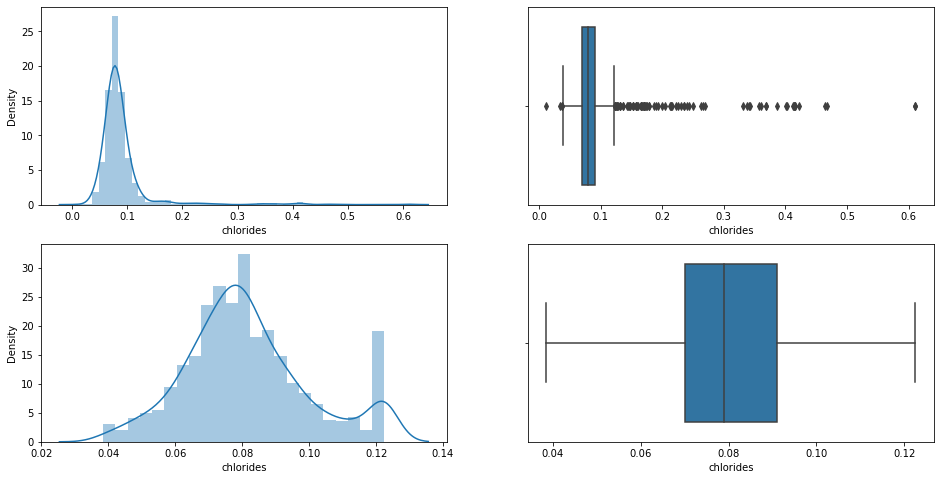

In [44]:
create_comparison_plot(df,df1,"chlorides")

**for free sulfur dioxide**

In [45]:
remove_outliers_IQR('free sulfur dioxide')

percentile25 7.0
percentile75 21.0
Upper limit 42.0
Lower limit -14.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


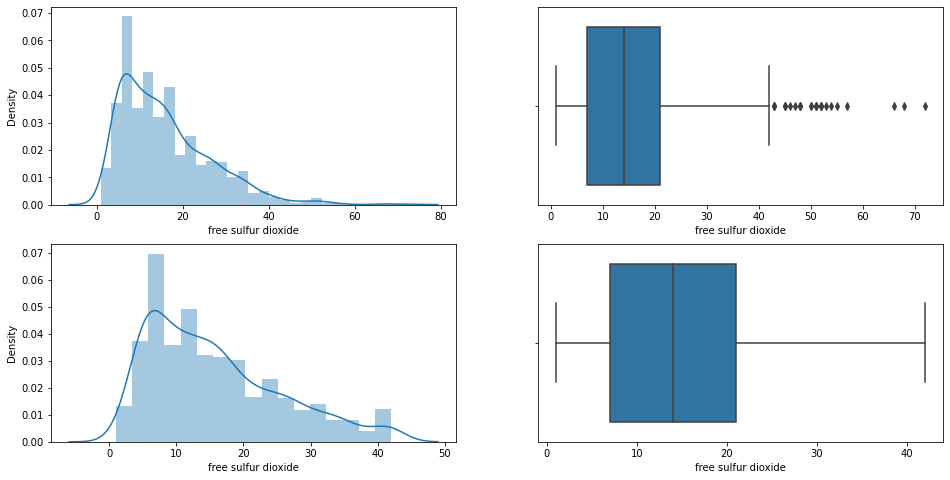

In [46]:
create_comparison_plot(df,df1,"free sulfur dioxide")

**for total sulfur dioxide**

In [47]:
remove_outliers_IQR('total sulfur dioxide')

percentile25 22.0
percentile75 63.0
Upper limit 124.5
Lower limit -39.5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


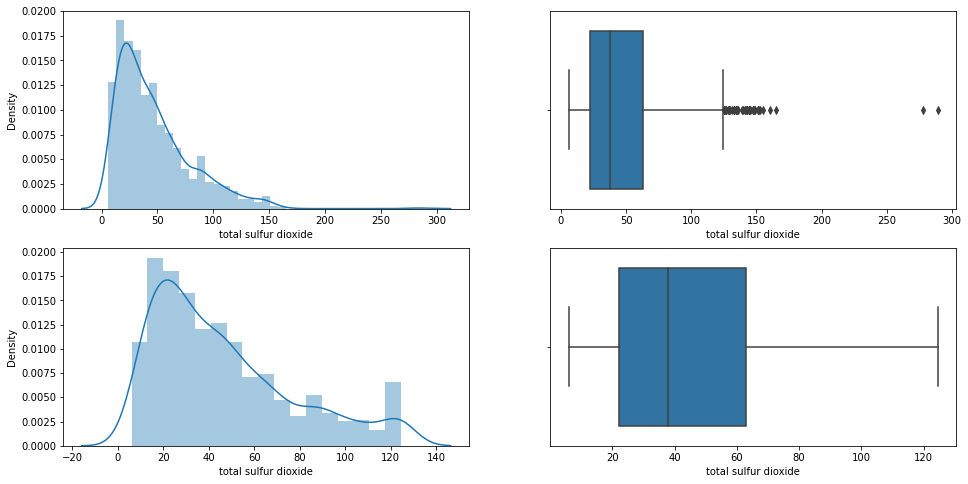

In [48]:
create_comparison_plot(df,df1,"total sulfur dioxide")

**for sulphates**

In [49]:
remove_outliers_IQR('sulphates')

percentile25 0.55
percentile75 0.73
Upper limit 0.9999999999999999
Lower limit 0.28000000000000014


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


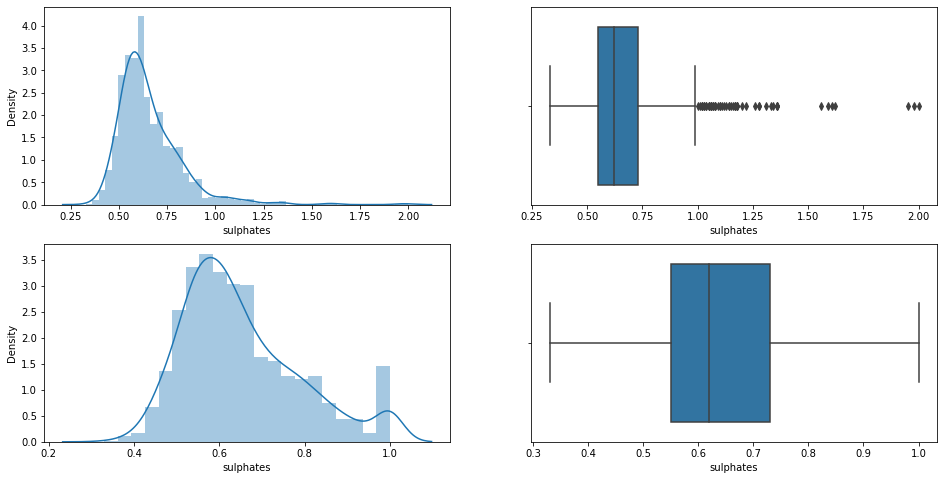

In [50]:
create_comparison_plot(df,df1,"sulphates")

**for alcohol**

In [51]:
remove_outliers_IQR('alcohol')

percentile25 9.5
percentile75 11.1
Upper limit 13.5
Lower limit 7.1000000000000005


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


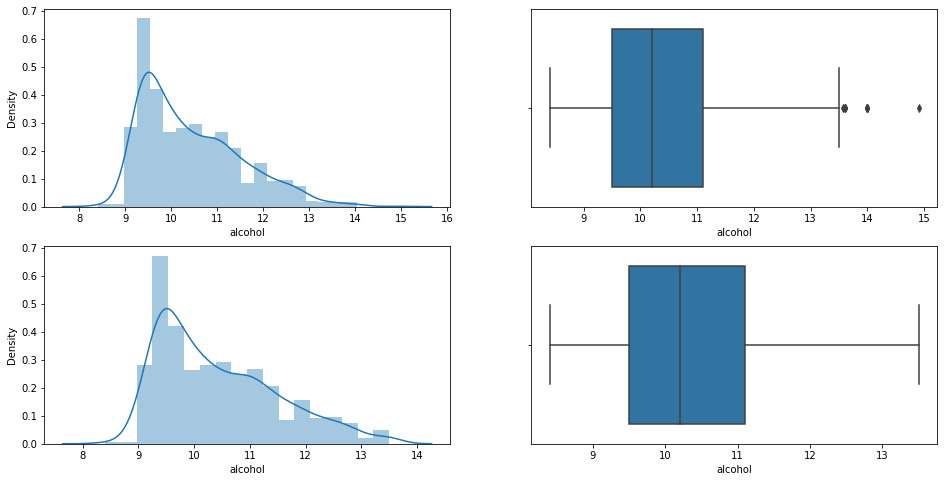

In [52]:
create_comparison_plot(df,df1,"alcohol")

In [53]:
# again checling the box plot

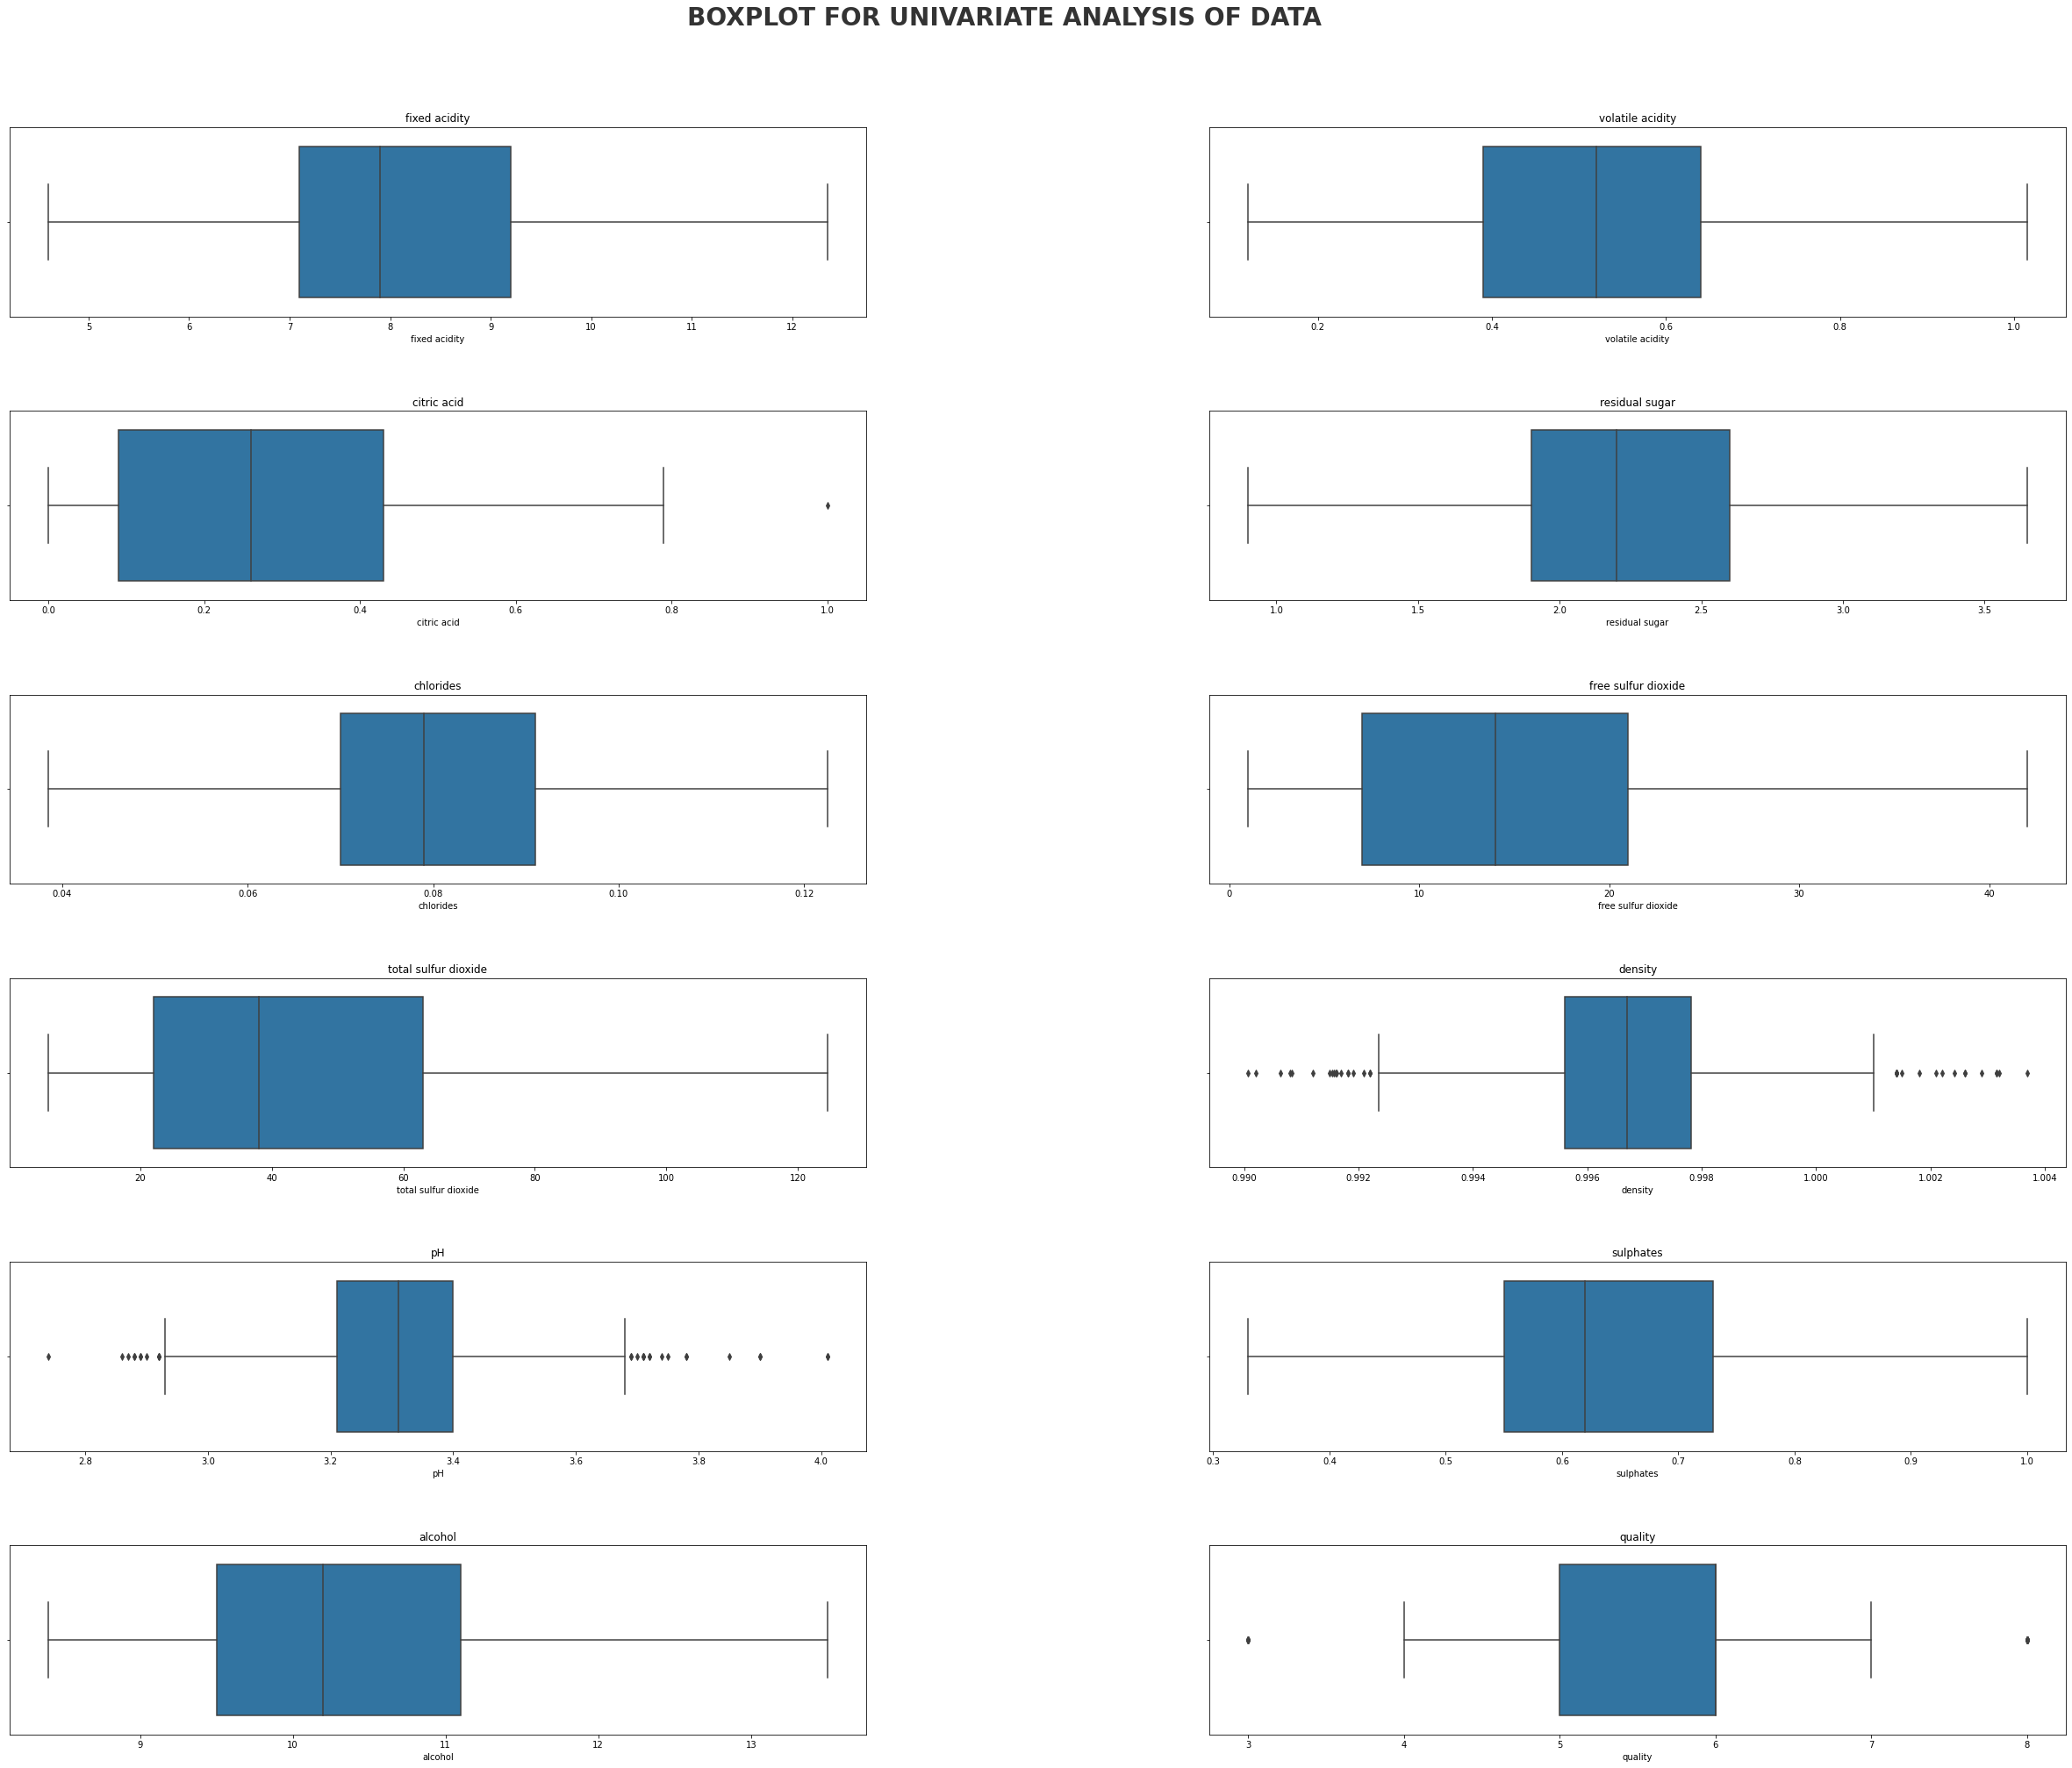

In [54]:
features = df1.columns
fig = plt.figure(figsize=[42,32])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold', alpha=0.8,)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(features):  
    ax1 = fig.add_subplot(6,2, i+1);
    ax1 = sns.boxplot(data = df1, x=col,);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

- **as ph and density are following normal distribution so for that we use Z score for handling oultliers**

In [55]:
def outlier_handler(col):
    var_mean=df1[col].mean()
    up_limit = var_mean +3*df1[col].std()
    low_limit = var_mean -3*df1[col].std()
    df1[col] = np.where(df1[col]>up_limit, up_limit, np.where(df1[col]<low_limit,low_limit,df1[col]))
    return df1[df1[col] > up_limit]

**for PH**

In [56]:
outlier_handler("pH")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


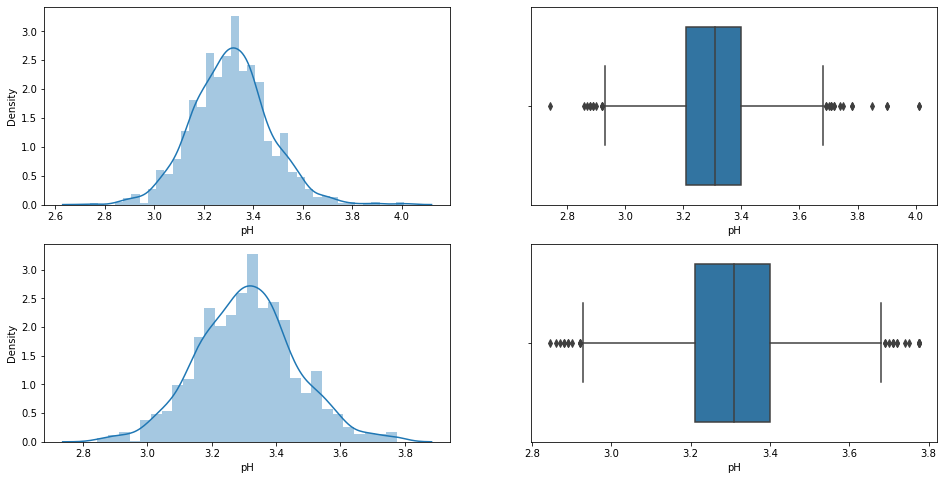

In [57]:
create_comparison_plot(df,df1,"pH")

In [58]:
# still beter 

**for density**

In [59]:
outlier_handler("density")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


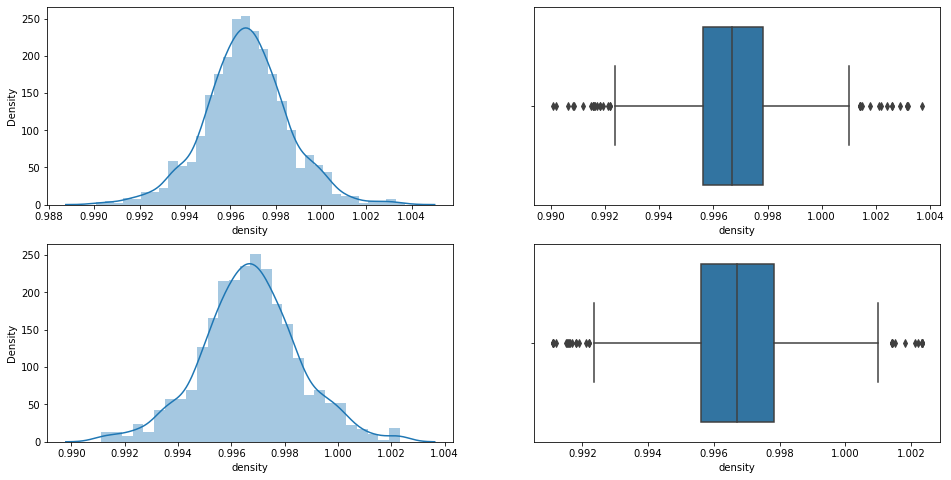

In [60]:
create_comparison_plot(df,df1,"density")

**for citric acid**

In [61]:
outlier_handler("citric acid")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


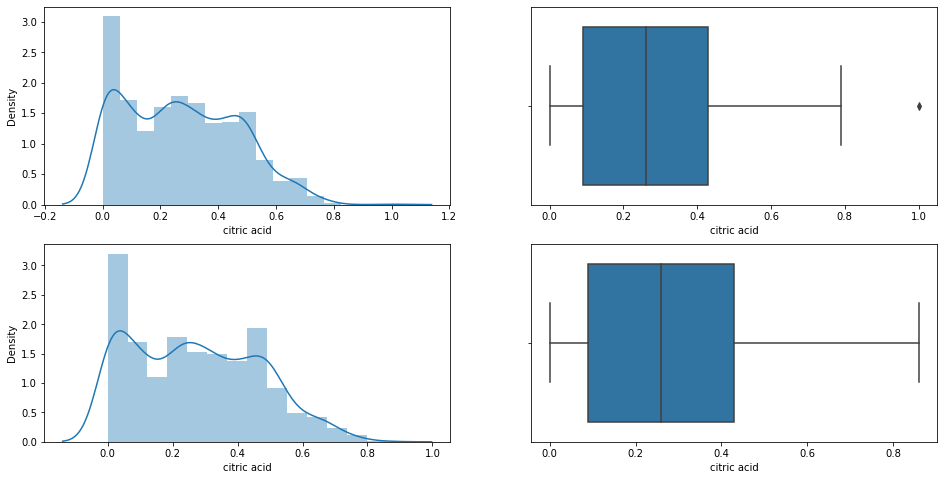

In [62]:
create_comparison_plot(df,df1,"citric acid")

In [66]:
df1.shape

(1359, 12)

In [67]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


### **data segregation**

**spliting the data with respect to quality feature**

In [68]:
x=df1.drop("quality",axis=1)
y=df1["quality"]

In [69]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)


**Feature selection**

In [70]:
#drop Constant Features Using Variance Threshold

In [71]:
### It will remove  zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(x_train) # you ave to do fit on x_train

VarianceThreshold(threshold=0)

In [72]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [73]:
sum(var_thres.get_support())

11

In [74]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [75]:
# there is no constant feature

**pearson correlation**

In [76]:
# if two  features are highly correlated ( not w.r.t target i m saying ) .then we can drop one of the feature as it is doing the same thing , for that we specify some threshold value

In [77]:
# taking a threshold value --> given by domain expert
# the time being we are taking threshold =0.95

In [78]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [79]:
# giving threshold 60 percent for the time 
threshold=0.95

In [80]:
correlation(x_train.iloc[:,:-1],threshold)

set()

In [81]:
# nothing to  drop

**feature Importance**

In [82]:
# This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [83]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x_train,y_train)

ExtraTreesClassifier()

In [84]:
print(model.feature_importances_)

[0.07730675 0.09399634 0.07940744 0.07670249 0.08120676 0.07732531
 0.10582786 0.08243929 0.07737602 0.10471573 0.143696  ]


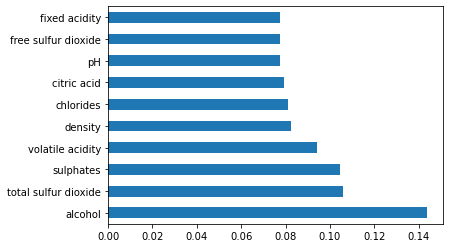

In [85]:
ranked_features=pd.Series(model.feature_importances_,index=x_train.columns)
ranked_features.nlargest(10).plot(kind="barh")
plt.show()

In [86]:
# these are the important features for our model so we are sticking to them 

**Target vs independent feature**

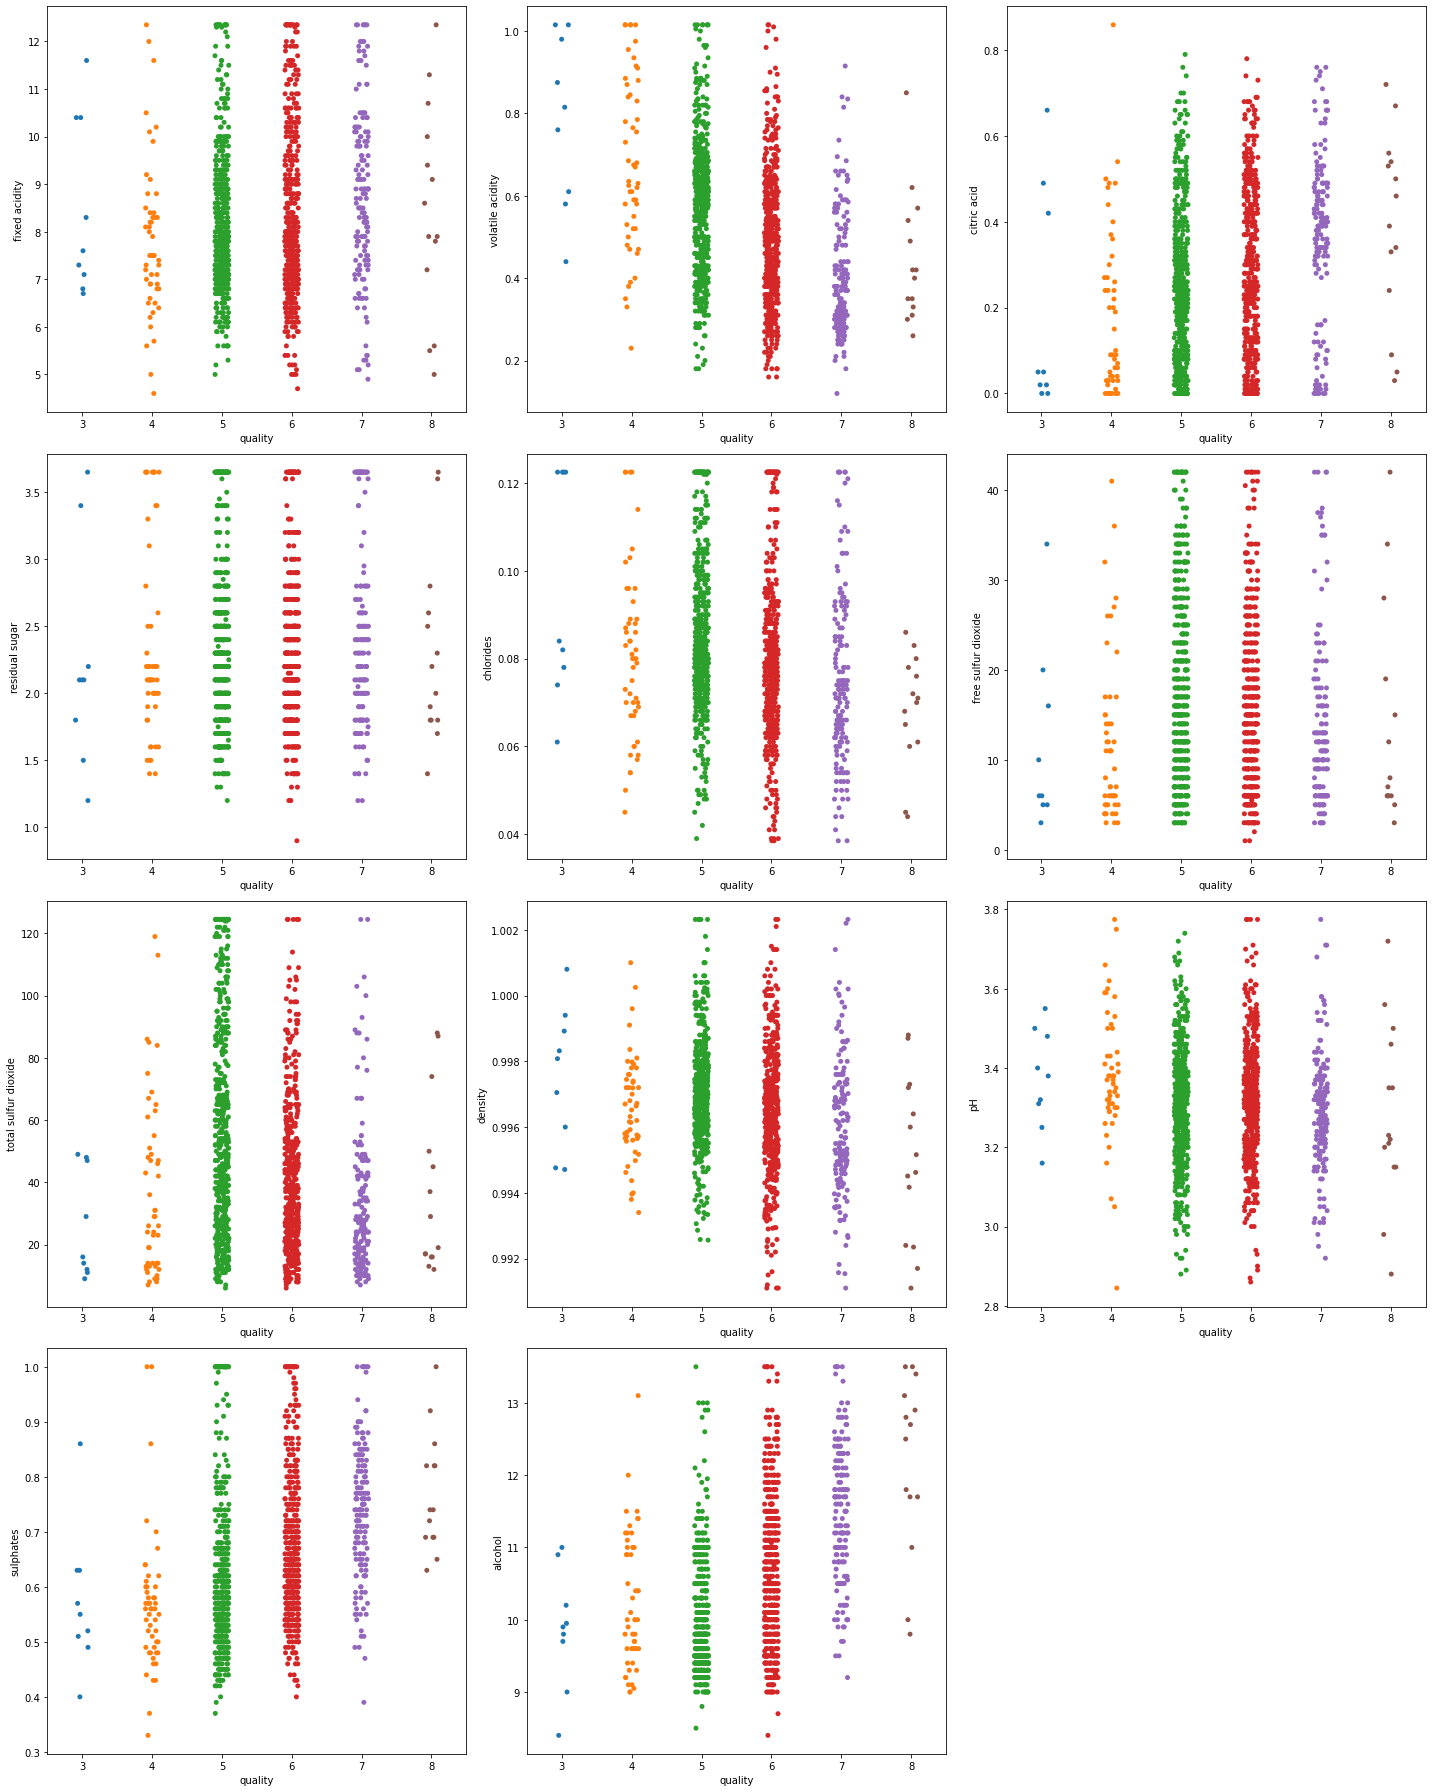

In [87]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_train.columns:
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.stripplot(y_train,x_train[column])
    plotnumber+=1
plt.tight_layout()

## standardize the datasets

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.

z=(x-x_mean)/std

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
s_x_train=scaler.fit_transform(x_train)
s_x_test=scaler.transform(x_test)

**model building**

- Support Vector Machine
https://scikit-learn.org/stable/modules/svm.html

In [89]:
from sklearn.svm import SVC
clf1 = SVC()

In [90]:
clf1.fit(s_x_train,y_train)

SVC()

In [91]:
# traing accuracy
clf1.score(s_x_train,y_train)

0.660670482420278

In [92]:
y_pred = clf1.predict(s_x_test)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

**Accuracy**

In [94]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6544117647058824

**Confusion Matrix**

In [95]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  2,  1,  0,  0],
       [ 0,  0, 48, 13,  1,  0],
       [ 0,  0, 17, 36,  2,  0],
       [ 0,  0,  0,  7,  5,  0],
       [ 0,  0,  0,  2,  1,  0]], dtype=int64)

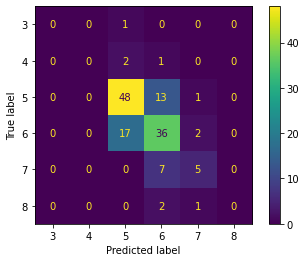

In [96]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf1,s_x_test,y_test)

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.71      0.77      0.74        62
           6       0.61      0.65      0.63        55
           7       0.56      0.42      0.48        12
           8       0.00      0.00      0.00         3

    accuracy                           0.65       136
   macro avg       0.31      0.31      0.31       136
weighted avg       0.62      0.65      0.63       136



**LogisticRegression** --> mutliclass classification (one vs rest)

**multi_class :{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’**

If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
clf2=LogisticRegression()

In [100]:
clf2.fit(s_x_train,y_train)

LogisticRegression()

In [101]:
# traing accuracy
clf1.score(s_x_train,y_train)

0.660670482420278

In [102]:
y_pred = clf2.predict(s_x_test)

**Accuracy**

In [103]:
#Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6102941176470589

**Confusion Matrix**

In [104]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  0,  0],
       [ 0,  1, 47, 13,  1,  0],
       [ 0,  0, 20, 30,  5,  0],
       [ 0,  0,  0,  6,  6,  0],
       [ 0,  0,  0,  2,  1,  0]], dtype=int64)

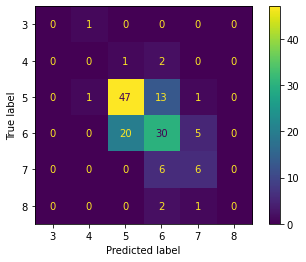

In [105]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf2,s_x_test,y_test)

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.69      0.76      0.72        62
           6       0.57      0.55      0.56        55
           7       0.46      0.50      0.48        12
           8       0.00      0.00      0.00         3

    accuracy                           0.61       136
   macro avg       0.29      0.30      0.29       136
weighted avg       0.58      0.61      0.60       136



**using grid search cv with these models with LogisticRegression**

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
log_model=LogisticRegression()

In [109]:
penalty = ['l1', 'l2', 'elasticnet']
solver=['newton-cg', 'lbfgs', 'sag', "saga"]
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
para_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C,'solver':solver}

In [110]:
Grid_model1=GridSearchCV(log_model,param_grid=para_grid,cv=10)

In [111]:
Grid_model1.fit(s_x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [112]:
Grid_model1.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'saga'}

In [113]:
y_pred=Grid_model1.predict(s_x_test)

In [114]:
# traing accuracy
Grid_model1.score(s_x_train,y_train)

0.5919869174161897

In [115]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,confusion_matrix

**Accuracy**

In [116]:
accuracy_score(y_test,y_pred)

0.6029411764705882

**Confusion Matrix**

In [117]:
confusion_matrix(y_test,y_pred)

array([[ 0,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  0,  0],
       [ 0,  1, 47, 13,  1,  0],
       [ 0,  0, 20, 30,  5,  0],
       [ 0,  0,  0,  7,  5,  0],
       [ 0,  0,  0,  2,  1,  0]], dtype=int64)

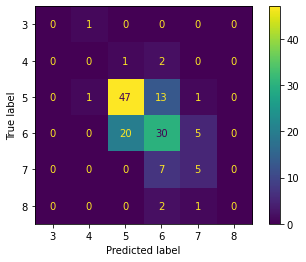

In [118]:
plot_confusion_matrix(Grid_model1,s_x_test,y_test)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.69      0.76      0.72        62
           6       0.56      0.55      0.55        55
           7       0.42      0.42      0.42        12
           8       0.00      0.00      0.00         3

    accuracy                           0.60       136
   macro avg       0.28      0.29      0.28       136
weighted avg       0.58      0.60      0.59       136



**using grid search cv with these models with SVC**

In [120]:
classifier = SVC(kernel = 'rbf', random_state = 0)

In [121]:
param_grid = { 'C':[0.9,1,1.1,1.2,1.3],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
Grid_model2 = GridSearchCV(classifier,param_grid,cv = 10)
Grid_model2.fit(s_x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=0),
             param_grid={'C': [0.9, 1, 1.1, 1.2, 1.3],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [122]:
Grid_model2.best_params_

{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [123]:
y_pred=Grid_model2.predict(s_x_test)

In [124]:
# traing accuracy
Grid_model2.score(s_x_train,y_train)

0.6639411283728537

**Accuracy**

In [125]:
accuracy_score(y_test,y_pred)

0.6397058823529411

**Confusion Matrix**

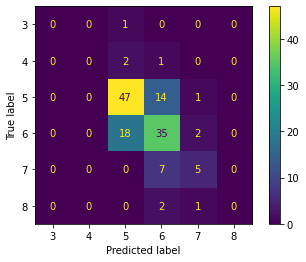

In [126]:
plot_confusion_matrix(Grid_model2,s_x_test,y_test)

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.69      0.76      0.72        62
           6       0.59      0.64      0.61        55
           7       0.56      0.42      0.48        12
           8       0.00      0.00      0.00         3

    accuracy                           0.64       136
   macro avg       0.31      0.30      0.30       136
weighted avg       0.60      0.64      0.62       136



## DecisionTree

**https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html**


Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data

In [128]:
from sklearn.tree import DecisionTreeClassifier

using data without standard scalar

In [129]:
dt_clf = DecisionTreeClassifier()

In [130]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [131]:
y_pred=dt_clf.predict(x_test)

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
#testing accuracy
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.5220588235294118

bad model as compare to other models

In [134]:
dt_clf.score(x_train,y_train)

1.0

training accuracy is 100 percent so overfitting is hapening

**using grid search cv with these models with DecisionTree**

In [135]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    }

In [136]:
Grid_model3 = GridSearchCV(estimator=dt_clf,param_grid=grid_param,cv = 5)


In [137]:
Grid_model3.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [138]:
Grid_model3.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'random'}

In [146]:
# creating with these best parameters 
dt_clf_with_best_params=DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,min_samples_leaf= 7,min_samples_split= 2,splitter='random')

In [148]:
dt_clf_with_best_params.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7,
                       splitter='random')

In [149]:
dt_clf_with_best_params.score(x_train,y_train)

0.5723630417007359

In [153]:
y_pred=dt_clf_with_best_params.predict(x_test)

**accuracy**

In [155]:
#testing accuracy
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.6029411764705882

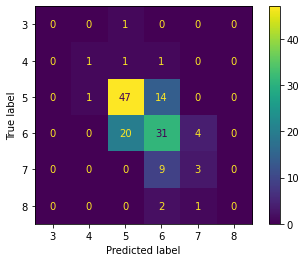

In [158]:
plot_confusion_matrix(dt_clf_with_best_params,x_test,y_test)

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.50      0.33      0.40         3
           5       0.68      0.76      0.72        62
           6       0.54      0.56      0.55        55
           7       0.38      0.25      0.30        12
           8       0.00      0.00      0.00         3

    accuracy                           0.60       136
   macro avg       0.35      0.32      0.33       136
weighted avg       0.57      0.60      0.59       136



In [160]:
# low accuracy as compare to svc and logestic regression

[Text(0.5416666666666666, 0.9166666666666666, 'X[9] <= 0.627\nentropy = 1.747\nsamples = 1223\nvalue = [9, 50, 515, 480, 155, 14]'),
 Text(0.28125, 0.75, 'X[10] <= 11.72\nentropy = 1.533\nsamples = 640\nvalue = [6, 42, 345, 218, 29, 0]'),
 Text(0.15625, 0.5833333333333334, 'X[10] <= 10.802\nentropy = 1.462\nsamples = 570\nvalue = [6, 40, 335, 172, 17, 0]'),
 Text(0.08333333333333333, 0.4166666666666667, 'X[6] <= 101.17\nentropy = 1.317\nsamples = 482\nvalue = [4, 28, 306, 137, 7, 0]'),
 Text(0.041666666666666664, 0.25, 'X[3] <= 1.434\nentropy = 1.392\nsamples = 423\nvalue = [4, 28, 251, 133, 7, 0]'),
 Text(0.020833333333333332, 0.08333333333333333, 'entropy = 1.292\nsamples = 14\nvalue = [1, 2, 10, 0, 1, 0]'),
 Text(0.0625, 0.08333333333333333, 'entropy = 1.371\nsamples = 409\nvalue = [3, 26, 241, 133, 6, 0]'),
 Text(0.125, 0.25, 'X[7] <= 0.996\nentropy = 0.358\nsamples = 59\nvalue = [0, 0, 55, 4, 0, 0]'),
 Text(0.10416666666666667, 0.08333333333333333, 'entropy = 0.811\nsamples = 8\nv

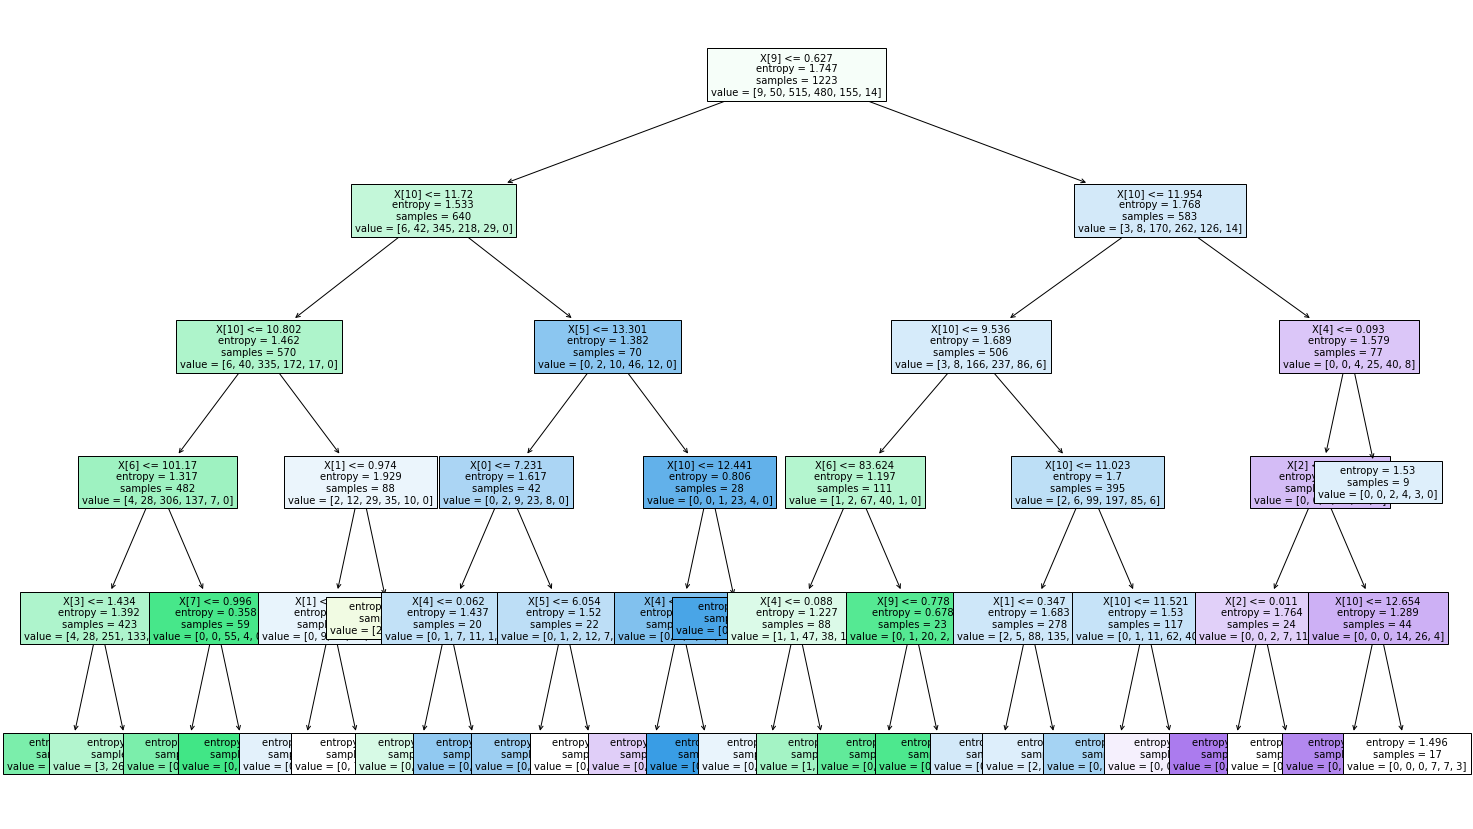

In [161]:
# to visulize the tree
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(dt_clf_with_best_params,filled=True,fontsize=10)